In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


✅ Task 1: Data Overview

In [2]:
# Display the first 5 rows of the dataset.
df = pd.read_csv("netflix_customer_churn.csv")
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [3]:
# Check for missing/null values in the dataset.
print("Missing values:")
print(df.isnull().sum())

Missing values:
customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64


In [4]:
# Check unique values for categorical columns
categ = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']
for i in categ:
    print(f"\nUnique values in '{i}':")
    print(df[i].unique())


Unique values in 'gender':
['Other' 'Female' 'Male']

Unique values in 'subscription_type':
['Basic' 'Standard' 'Premium']

Unique values in 'region':
['Africa' 'Europe' 'Asia' 'Oceania' 'South America' 'North America']

Unique values in 'device':
['TV' 'Mobile' 'Laptop' 'Desktop' 'Tablet']

Unique values in 'payment_method':
['Gift Card' 'Crypto' 'Debit Card' 'PayPal' 'Credit Card']

Unique values in 'favorite_genre':
['Action' 'Sci-Fi' 'Drama' 'Horror' 'Romance' 'Comedy' 'Documentary']


✅ Task 2: Univariate Analysis

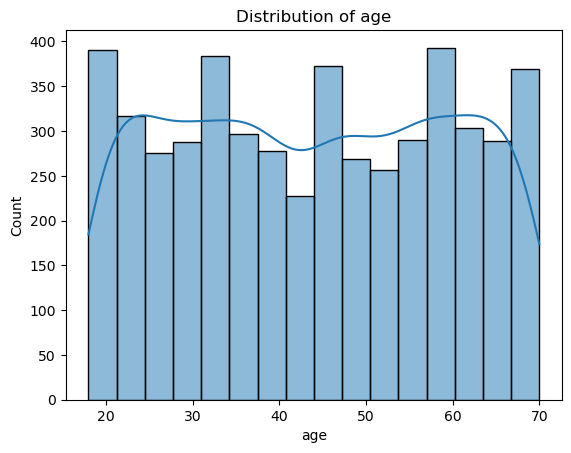

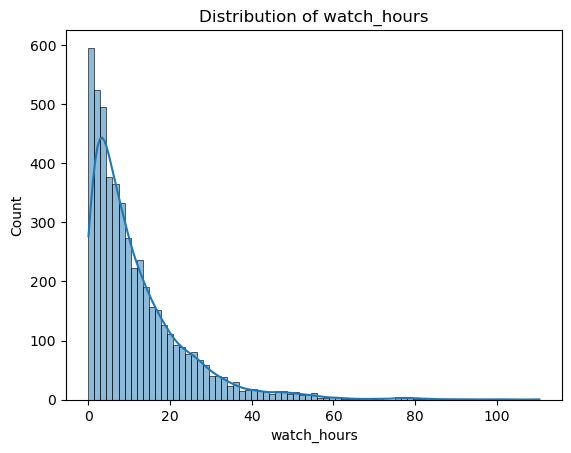

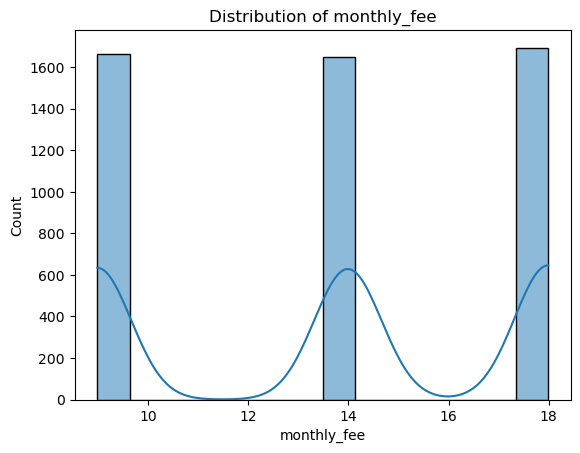

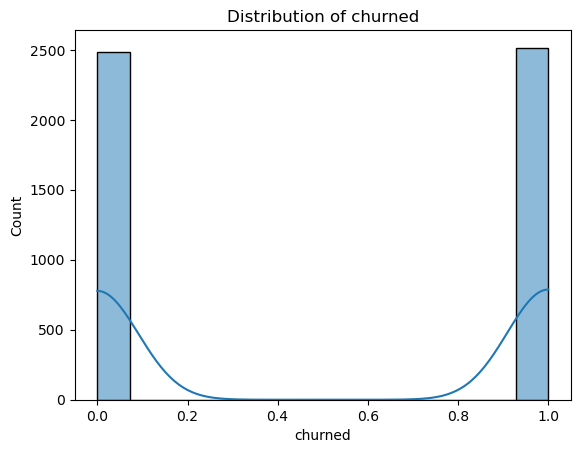

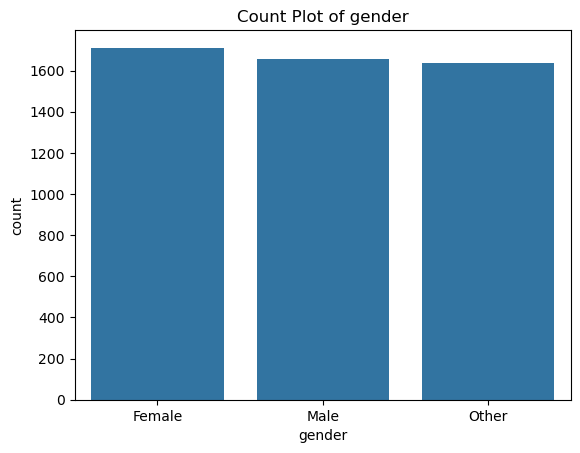

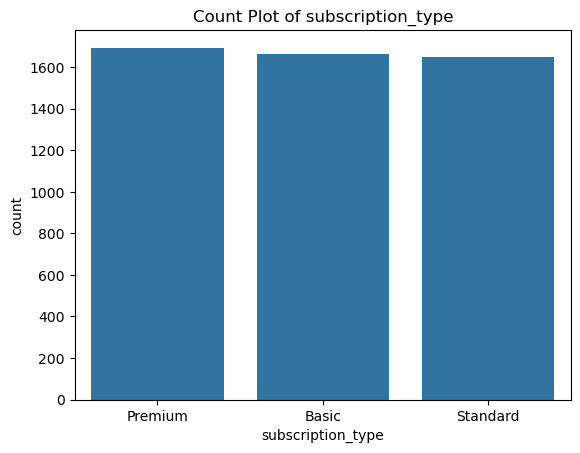

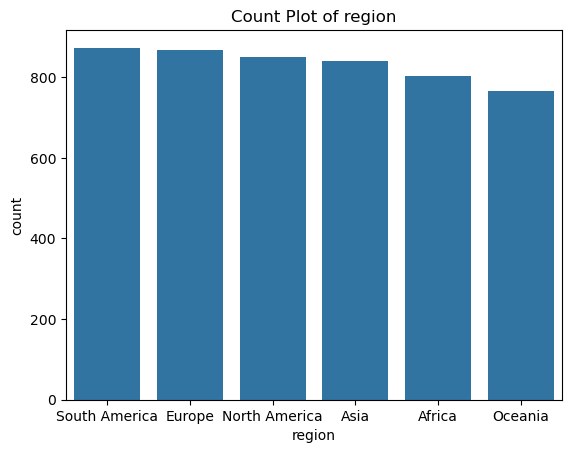

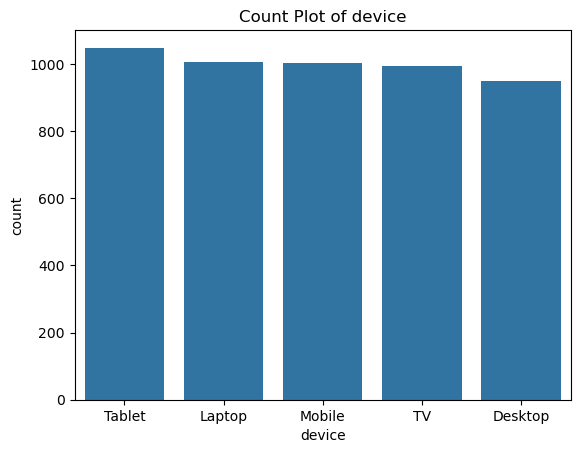

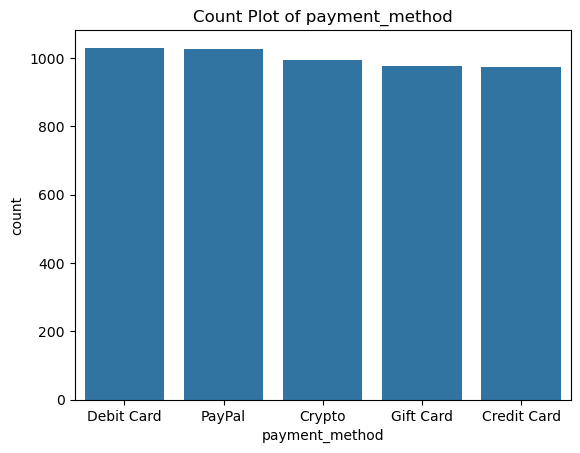

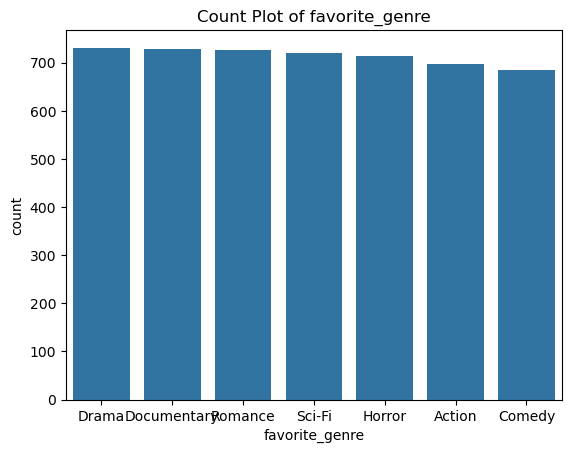

In [5]:
# Plot the distribution of:
numerical= ['age', 'watch_hours', 'monthly_fee', 'churned']

for j in numerical:
    sns.histplot(df[j], kde=True)
    plt.title(f'Distribution of {j}')
    plt.show()

# Count plots for categorical variables
for k in categ:
    sns.countplot(x=k, data=df, order=df[k].value_counts().index)
    plt.title(f'Count Plot of {k}')
    plt.xticks()
    plt.show()


✅ Task 3: Bivariate Analysis

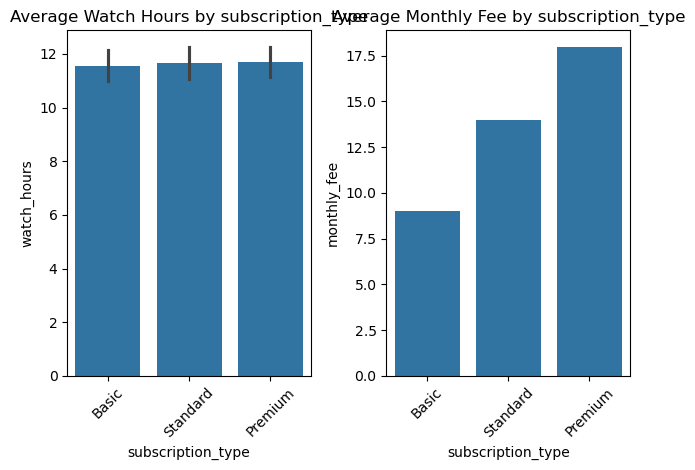

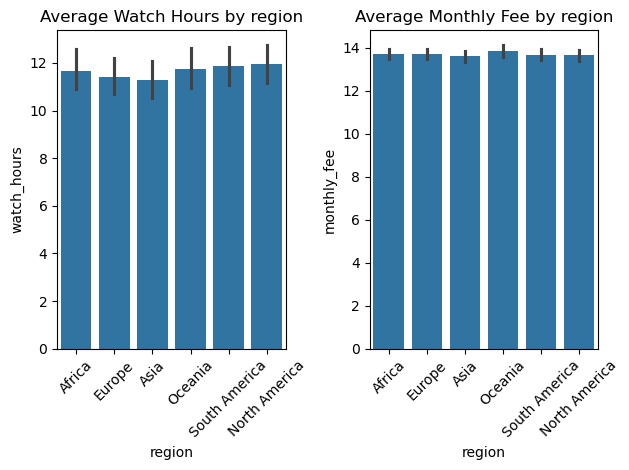

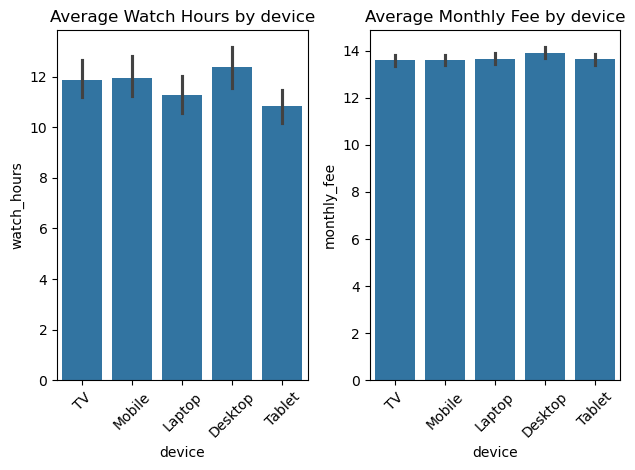

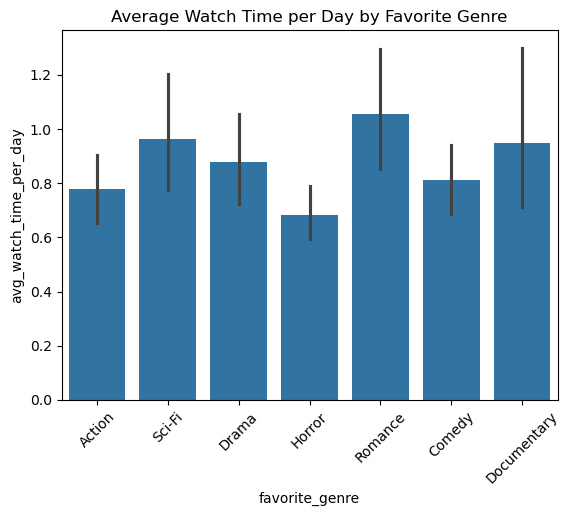

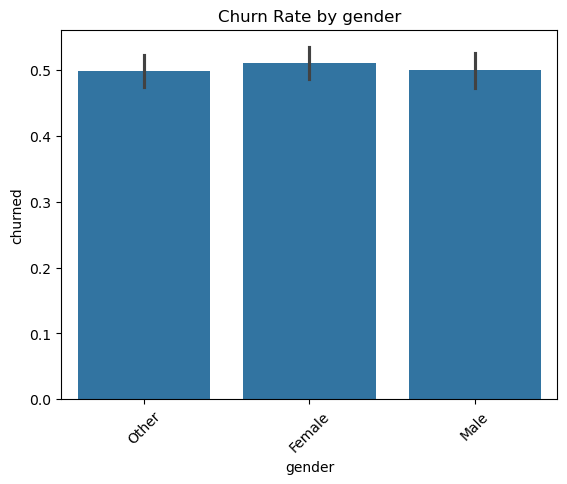

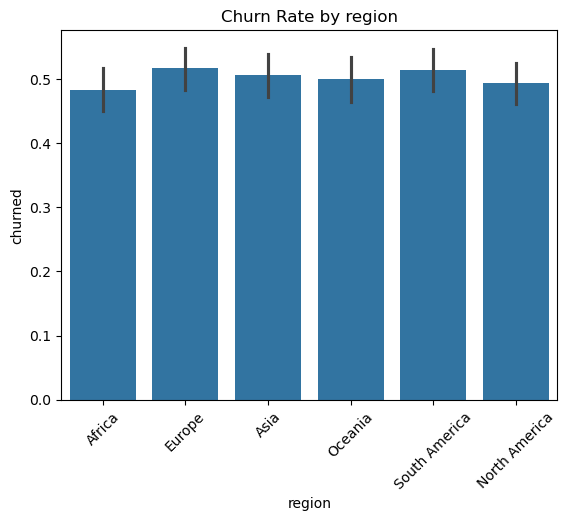

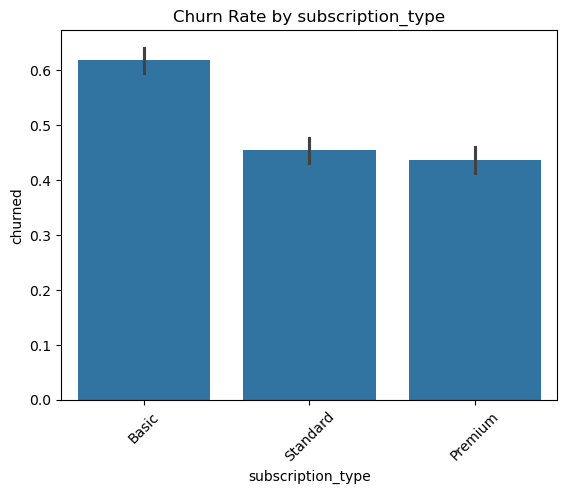

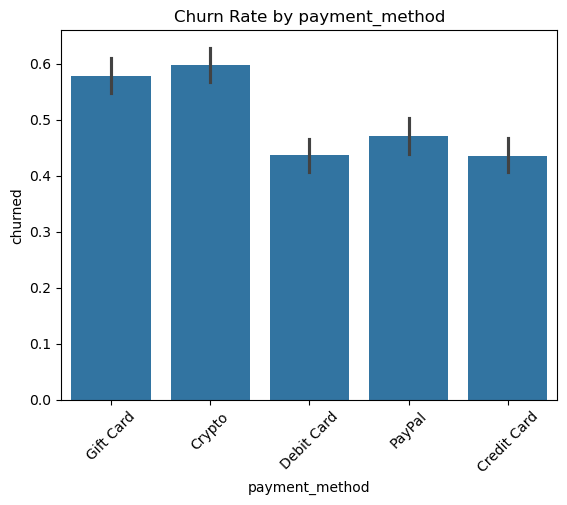

In [6]:
# Compare average watch_hours and monthly_fee across:

for i in ['subscription_type', 'region', 'device']:
    plt.figure()

    plt.subplot(1, 2, 1)
    sns.barplot(x=i, y='watch_hours', data=df)
    plt.title(f'Average Watch Hours by {i}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.barplot(x=i, y='monthly_fee', data=df)
    plt.title(f'Average Monthly Fee by {i}')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Avg watch time per day by favorite_genre
plt.figure()
sns.barplot(x='favorite_genre', y='avg_watch_time_per_day', data=df, estimator='mean')
plt.title('Average Watch Time per Day by Favorite Genre')
plt.xticks(rotation=45)
plt.show()

# Churn analysis
for j in ['gender', 'region', 'subscription_type', 'payment_method']:
    plt.figure()
    sns.barplot(x=j, y='churned', data=df)
    plt.title(f'Churn Rate by {j}')
    plt.xticks(rotation=45)
    plt.show()


✅ Task 4: Correlation Analysis

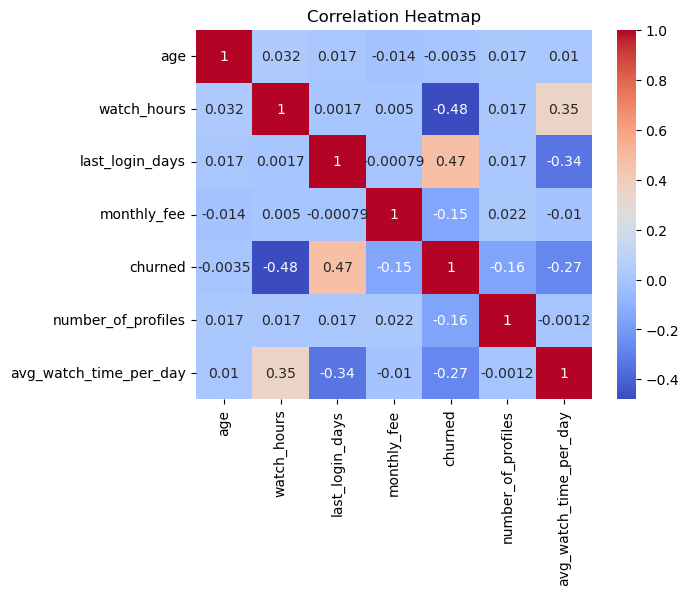

In [7]:
# Create a heatmap of correlation between numerical variables.
plt.figure()
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


✅ Task 5: Insights & Recommendations

Based on the analysis:

1. Customers with lower watch hours appear to have higher churn rates.
2. Premium users generally have higher engagement and lower churn than Basic users.
3. The region with the highest average watch hours is North America.
4. Subscription type has a strong correlation with both monthly fee and churn.
5. Favorite genre seems to influence avg watch time per day.
6. Devices used for streaming might affect the ease of use and customer satisfaction.
